# 1. házi feladat (HF1)
**Beadási határidő: 09.25. (hétfő) éjfél**

Beküldés: A Microsoft Teams felületén keresztül

<font style='color: rgb(200,0,0)'>Adj szöveges választ is, ahol a feladatkitűzés ezt kéri!</font>

## 1. Feladat (HF1/1) (11 pont)

A [Round University Ranking (RUR)](https://roundranking.com/ranking/world-university-rankings.html#world-2021) különböző országok egyetemeit rangsorolja világszerte. Az elemzésben 870 egyetemet rangsorolnak különböző szempontok alapján, mint például az egyetemen zajló oktatás és kutatás minősége. A legjobb egyetemeknek különböző minősítéseket osztanak, például a legjobb 100 egyetem gyémánt minősítést, a következő 100 arany minősítést kap, és így tovább...<br><br>
**a)** (2 pont)<br>A tanult scrapelési technika segítségével töltsük le (a fenti oldalról) az egyetemeket, és hogy mely országban találhatóak, illetve milyen minősítést kaptak. A letöltött adatokat töltsük be egy Pandas DataFramebe, az oszlopok nevei legyenek <font style='font-style : oblique'>University</font>, <font style='font-style : oblique'>Country</font> és <font style='font-style : oblique'>League</font>. <br><br>
*Fontos: Figyeljünk arra, hogy ne terheljük túl a RUR weboldalát: Ha egyszer már sikerült kigyűjtenünk az adatokat, akkor tároljuk el egy tetszőleges fájlban a gépünkön, és ne scrapeljük le újra minden futtatásnál!*

In [1]:
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.by import By
import pandas as pd

In [2]:

driver = webdriver.Chrome()
driver.get(r'https://roundranking.com/ranking/world-university-rankings.html')

time.sleep(3)
source = driver.page_source
table = BeautifulSoup(source).find('table')

In [3]:
tablazat = pd.read_html(str(table))[0]
tablazat = tablazat[['University','Country','League']]
tablazat.to_csv('../Adatok/unis.csv', sep=',', index=False)

/tmp/ipykernel_34695/482359629.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tablazat = pd.read_html(str(table))[0]


**b)** (1 pont) <br> A letöltött adatainkat szűrjük meg a következő pontok alapján:
- Hagyjuk el az amerikai egyetemeket.
- Csak a gyémánt, arany, ezüst és bronz minősítésű egyetemeket tartsuk meg.

Tipp: Használjuk a Pandas DataFrame *.query()* metódusát. (Emlékeztető: '@' jellel tudunk változókra hivatkozni a lekérés szintaxisában.)

In [4]:
t1 = tablazat.query("League in ['Diamond League', 'Golden League', 'Silver League', 'Bronze League'] and Country != 'USA' " )
t1

,University,Country,League
4,Imperial College London,UK,Diamond League
6,Peking University,China,Diamond League
8,University of Oxford,UK,Diamond League
10,University of Cambridge,UK,Diamond League
12,ETH Zurich (Swiss Federal Institute of Technol...,Switzerland,Diamond League
...,...,...,...
393,Curtin University,Australia,Bronze League
394,Mahidol University,Thailand,Bronze League
395,Brunel University,UK,Bronze League
396,Hunan University,China,Bronze League


**c)** (2 pont)<br> Készítsünk halmozott oszlopdiagramot az adatokból:
- Csak azokat az országokat hagyjuk meg, akiknek legalább 10 egyeteme szerepel a kapott táblázatban.
- Rendezzük növekvő sorrendbe az országokat aszerint, hogy hány egyetem kapott az adott országból legalább bronz minősítést. 
- Az oszlopdiagram y tengelyén szerepeljenek az országok az előbb kapott sorrendben. Az x tengelyen pedig halmozva szerepeljenek, hogy az adott országban hány bronz, ezüst, arany, majd gyémánt minősítésű egyetem szerepel. Ne felejtsük el színezni is az oszlopokat!

Tipp: Az ábra könnyedén elkészíthető a Pandas DataFrame beépített *.plot.barh(stacked=True)* metódusával. Ehhez azonban megfelelő formára kell hoznunk a táblázatunkat. Legyenek a soraink az országok, oszlopaink pedig a Bronze, Silver, Golden, Diamond oszlopok. Egy adott cellában például UK - Bronze szerepeljen, hogy az Egyesült Királyságban hány bronz minősítésű egyetem található. <br> Ha eddig mindent a leírtak szerint csináltál, akkor ezt a táblázatot elkészíti a következő kód: <br>
<code>df2=pd.crosstab(df.Country, df.League, values=df.University, aggfunc=len)[['Bronze League', 'Silver League', 'Golden League', 'Diamond League']].fillna(0)</code><br>
Az ábrának körülbelül így kellene kinéznie, de nem tilos ennél szebb ábrát készíteni! :)
![league](../Adatok/league.png)

<AxesSubplot:ylabel='Country'>

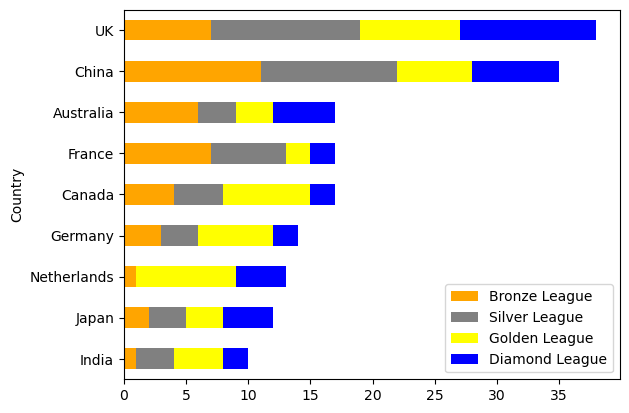

In [5]:
t2=pd.crosstab(t1.Country, t1.League, values=t1.University, aggfunc=len)[['Bronze League', 'Silver League', 'Golden League', 'Diamond League']].fillna(0)

osszesitett = t1.groupby(['Country'])['League'].count()

t2 = t2.merge(osszesitett, on='Country')
t2 = t2.sort_values(by='League')[-9:]

t2[['Bronze League', 'Silver League', 'Golden League', 'Diamond League']].plot.barh(stacked=True, color = {'Bronze League' : 'orange', 'Silver League' : 'gray', 'Golden League' : 'yellow', 'Diamond League' : 'blue'})


**d)** (1 pont) <br> Térjünk vissza a b pont végrehajtása előtti adatainkhoz. Nézzük meg melyek azok az országok, amelyeknek minden egyeteme kapott valamilyen kitüntetést. (Kitüntetés alatt gyémánt, arany, ezüst, bronz vagy réz minősítést értünk.)

In [6]:
orszagok = []
for i in tablazat['Country']:
    if i not in orszagok:
        orszagok.append(i)

wl = tablazat.query("League == 'World League' ")['Country']

for j in wl:
    if j in orszagok:
        orszagok.remove(j)

print(orszagok)

['Sweden', 'Netherlands', 'Hong Kong', 'Macau', 'Qatar']


**e)** (1 pont) <br> Magyarország is szerepel a kitüntetett országok között. Nézzük meg, hogy mely mérőszámban teljesítenek kiválóan a magyar egyetemek, és hogy pontosan mit mér ez a mérőszám. 2-3 mondatban foglaljuk össze a tapasztalatainkat. 

In [7]:
tablazat[tablazat['Country'] == 'Hungary']

,University,Country,League
111,Central European University,Hungary,Golden League
183,Semmelweis University,Hungary,Golden League
421,University of Debrecen,Hungary,Copper League
529,University of Pecs,Hungary,World League
710,Eotvos Lorand University,Hungary,World League
742,University of Szeged,Hungary,World League
861,Budapest University of Technology and Economics,Hungary,World League
971,University of Sopron,Hungary,World League
1019,Corvinus University of Budapest,Hungary,World League


**f)** (4 pont) <br> A rangsorban található egyetemek oldalait megnyitva megtudhatjuk, hogy milyen célt tűztek ki maguknak. (Mission Statement.) Töltsük le az első 200 egyetemét (ha lassú a gép, akkor elegendő az első 20-30-at) és készítsünk belőlük szófelhőt. Hagyjuk ki a szófelhőből a University szót. Mit tapasztalunk, foglaljuk össze 2-3 mondatban. <br>
> Tipp: A megoldáshoz célszerű egyenként megnyitni az egyetemek oldalaira vezető linkeket. Ezeket a linkeket tartalmazza az első pontban letöltött source fájl. Nem feltétlenül szükséges letölteni a teljes htmlt. Selenium segítségével is le tudjuk kérdezni a tagekben található szövegeket. Például ha egy "scrape_me" classban szereplő szöveget szeretnénk kinyerni, akkor használhatjuk a driver.find_element_by_class_name("scrape_me").text kódot. A szófelhő elkészítésével kapcsolatban pedig rengeteg segítséget találsz itt: [wordcloud](https://www.datacamp.com/community/tutorials/wordcloud-python)

*Fontos: Figyeljünk arra, hogy ne terheljük túl a RUR weboldalát: Ha egyszer már sikerült kigyűjtenünk az adatokat, akkor tároljuk el egy tetszőleges fájlban a gépünkön, és ne scrapeljük le újra minden futtatásnál!*

**Alternatíva:**<br> Amennyiben a scrapelés túl nehéznek bizonyul, 2 pontért elfogadjuk csak a szófelhő elkészítését is. Ehhez töltsétek be az [Adatok](https://math.bme.hu/~pinterj/BevAdat1/Adatok/) mappában található worldcloud.txt fájlból az egyetemek küldetésnyilatkozatait. 

In [8]:
"""
driver = webdriver.Chrome()
driver.get(r'https://roundranking.com/ranking/world-university-rankings.html')

time.sleep(3)
source = driver.page_source
source = BeautifulSoup(source)
table = source.find('table')
"""


"\ndriver = webdriver.Chrome()\ndriver.get(r'https://roundranking.com/ranking/world-university-rankings.html')\n\ntime.sleep(3)\nsource = driver.page_source\nsource = BeautifulSoup(source)\ntable = source.find('table')\n"

In [9]:
"""sorok = []
for i in range(1,2):
    sorok += table.find_all('tr', {'class':'az-row-'+str(i)+'00'})

linkek = []
string = 'https://roundranking.com'
n = 0
for j in sorok:
    start = str(j).find('href') + 6
    end = str(j).find('.html') + 5
    linkek.append(str(string + str(j)[start:end]))
"""

"sorok = []\nfor i in range(1,2):\n    sorok += table.find_all('tr', {'class':'az-row-'+str(i)+'00'})\n\nlinkek = []\nstring = 'https://roundranking.com'\nn = 0\nfor j in sorok:\n    start = str(j).find('href') + 6\n    end = str(j).find('.html') + 5\n    linkek.append(str(string + str(j)[start:end]))\n"

In [10]:
"""driver = webdriver.Chrome()

text = ''
linkek = linkek[:30]
for k in linkek:
    driver.get(k)
    time.sleep(3)

    text += driver.find_element(By.CLASS_NAME, 'mission').text
    text += ' '

text = " ".join(text)
"""

'driver = webdriver.Chrome()\n\ntext = \'\'\nlinkek = linkek[:30]\nfor k in linkek:\n    driver.get(k)\n    time.sleep(3)\n\n    text += driver.find_element(By.CLASS_NAME, \'mission\').text\n    text += \' \'\n\ntext = " ".join(text)\n'

In [11]:
"""from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

szofelho = WordCloud().generate(szoveg)

plt.imshow(szofelho, interpolation='bilinear')
plt.axis("off")
plt.show()
"""

'from PIL import Image\nfrom wordcloud import WordCloud, STOPWORDS, ImageColorGenerator\nimport matplotlib.pyplot as plt\n\nszofelho = WordCloud().generate(szoveg)\n\nplt.imshow(szofelho, interpolation=\'bilinear\')\nplt.axis("off")\nplt.show()\n'

## 2. Feladat (HF1/2) (9 pont)

A dinamikus programozás egy széles körben elterjedt matematika eljárás, mellyel többek között algoritmuselméleti, optimalizálási problémákat lehet effektíven megoldani. A két fő alappillére a rekurzív gondolkodásmód, és a kisebb részfeladatokra bontás, azok eredményeinek eltárolása, felhasználása. Ezek együttes alkalmazása számtalan problémát képes gyakorlatban is alkalmazható sebességgel megoldani. <br><br>
Tanulmányaink során jó pár dinamikus programozáson alapuló algoritmussal találkozhattunk, és fogunk is találkozni a közeljövőben több tantárgy keretein belül is. Az egyik ilyen algoritmus, mellyel nemrég ismerkedtünk meg a DTW, azaz dynamic time warping, dinamikus idővetemítés. <br><br>
Feladatunk a DTW algoritmus implementálása. Emlékeztetőül itt láthatjuk az algoritmus leírását:<br><br>
<b>Dinamikus idővetemítés (dynamic time warping)</b> <br>
Legyen $x\in \mathbb R^n$, $y\in \mathbb R^m$, ekkor a két vektor (idősor) <b>DTW</b> távolságát a következő rekurziós formulával tudjuk kiszámolni:<br>
- $\text{DTW}(0,0)=|x_0-y_0|$
- $\text{DTW}(0,j)=|x_0-y_j|+\text{DTW}(0, j-1)+c_ö, \text{ahol } 1\leq j \leq m$
- $\text{DTW}(i,0)=|x_i-y_0|+\text{DTW}(i-1, 0)+c_{ny}, \text{ahol } 1\leq i \leq n$
- $\text{DTW}(i,j)=|x_i-y_j|+min\{\text{DTW}(i-1,j-1), \text{DTW}(i, j-1)+c_ö, \text{DTW}(i-1, j)+c_{ny}\}$,
ahol $1\leq i \leq n$, $1\leq j \leq m$, és $c_ö=$ összenyomás költsége, $c_{ny}=$ nyújtás költsége. 
- Dinamikus programozásnál általában egy $n\times m$-es mátrixot töltünk ki ezzel a formulával. (Például először kiszámoljuk DTW(0,0)-t (1. pont), majd kitöltjük az első sort (2. pont), aztán első oszlopot (3. pont), végül a többi cellát (4. pont).)
- A két idősor távolságát megadja a jobb alsó cella, azaz $\text{DTW}(n,m)$.
- A vetemítő utat meghatározhatjuk visszafelé: Kiindulunk a jobb alsó sarokból, majd megnézzük, hogy a $\text{DTW}(i-1,j-1), \ \text{DTW}(i, j-1),\ \text{DTW}(i-1, j)$ értékek közül melyikből származtattuk a $\text{DTW}(i,j)$ értéket, majd annak megfelelően nyomjuk össze, vagy nyújtjuk meg az idősort, ha szükséges.

**a)** (1 pont) <br> Kezdetben az első alappillérrel foglalkozunk: Az alábbi mezőben egy félkész függvényt láthatunk, melyet úgy kell kiegészítenünk, hogy rekurzív függvényhívásokkal számolja ki két idősor DTW távolságát. A programot nagy vonalakban magyarázzuk el kommentben vagy egy pár soros összefoglalásban!<br>
**Fontos:** A feladat megoldásánál ne használjunk se for ciklust, se tömböket! Csak és kizárólag rekurzív függvényhívás segítségével oldjuk meg a feladatot! <br>


In [12]:
import numpy as np

def DTW(x, y, c_ö, c_ny, i, j):
    """
      Megadja két idősor DTW távolságát
      input:
        x,y - a két idősor np.array típussal megadva
        c_ö, c_ny - az összenyomás és nyújtás költsége
        i,j - a kiszámolandó cella koordinátái
      output:
        x_i,y_i DTW távolsága
    """

    c_ö = 0
    c_ny = 0

    #print(x,y)

    if i==0 and j==0:
        return abs(x[0]-y[0]) #Képlet 1. pont
    elif i==0:
        return abs(x[0]-y[j]) + DTW(x,y,c_ö,c_ny,i,j-1)+c_ö #Képlet 2. pont
    elif j==0:
        return abs(x[i]-y[0]) + DTW(x,y,c_ö,c_ny,i-1,j)+c_ny #Keplet 3. pont
    else:
        bf= DTW(x,y,c_ö,c_ny,i-1,j-1) #cellától balra-fent lévő elem
        b = DTW(x,y,c_ö,c_ny,i,j-1)   #cellától balra lévő elem
        f = DTW(x,y,c_ö,c_ny,i-1,j)   #cella feletti elem
        return abs(x[i]-y[j]) + np.min(np.array([bf, b+c_ö, f+c_ny ])) #Keplet 4. pont


#x=np.array([1,2,3,4,5])
#y=np.array([2,4,6,8])
#print(DTW(x,y,0,0,len(x)-1,len(y)-1))

**b)** (3 pont) <br> Mi a probléma az a) pontban a megoldással? Miért van szükség a második alappillérre is?  Programozz le egy jobb megoldást, amely használja az órán tanult dinamikus programozási elvet! Fejtsd ki pár sorban, magyarázd el a 2 megoldás közötti különbséget is! <br>

In [13]:
def DTW_d(x, y, c_ö, c_ny):
    tablazat = np.array([[0 for i in y] for j in x])
    
    for i in range(len(x)):
        for j in range(len(y)):
            if i==0 and j == 0:
                tablazat[0][0] = abs(x[0]-y[0])
            elif i == 0:
                tablazat[0][j] = abs(x[0]-y[j]) + tablazat[0][j-1] + c_ö
            elif j == 0:
                tablazat[i][0] = abs(x[i]-y[0]) + tablazat[i-1][0] + c_ny
            else:
                bf= tablazat[i-1][j-1]
                b = tablazat[i][j-1]
                f = tablazat[i-1][j]
                tablazat[i][j] = abs(x[i]-y[j]) + np.min(np.array([bf, b + c_ö, f + c_ny ]))
    
    return tablazat, tablazat[len(x)-1][len(y)-1] #Térjünk vissza a megfelelő számmal, ami a két idősor DTW távolsága.

#x=np.array([1,2,3,4,5])
#y=np.array([2,4,6,8])
#print(DTW(x,y,0,0))

Válasz: Az a) pontban megadott megoldás rekurzív módon oldja meg a feladatot, aminek az a hátránya hogy rövidlátó módon csak az előtte lévő feladatot számolja ki, így van hogy egy cellát 3szor is kiszámol. <br>
Ezzel szemben a b) megoldásban mindent elég csak egyszer kiszámolni, és ezt a kiszámolt adatot hívjuk vissza újra és újra

**c)** (1 pont) <br>
Teszteljük le, hogy melyik verzió fut le gyorsabban, a sima rekurzív, vagy a dinamikus programozásos algoritmus! <br>
Használjuk a Jupyter Notebook beépített time cell magic függvényét. <br>
Az alábbi kóddal generáljunk véletlenszerűen 10 hosszú idősorpárokat, majd számoljuk ki mind a 20 idősorpárnak a DTW távolságát a sima rekurzív, és a dinamikus algoritmussal is. <br> Melyik fut le gyorsabban? Megéri-e már ilyen rövid idősorok esetén is a dinamikus programozást használni? 

In [14]:
import numpy as np
time_series=[]
for i in range(20):
    time_series.append((np.random.randint(1,100,10),np.random.randint(1,100,10)))

#time_series[0]

In [15]:
%%time
for i in time_series:
    x=np.array(i[0])
    y=np.array(i[1])
    DTW(x, y, 0, 0, len(x)-1, len(y)-1)

CPU times: user 2min 3s, sys: 45.8 ms, total: 2min 3s
Wall time: 2min 3s


In [16]:
%%time
for i in time_series:
    x=np.array(i[0])
    y=np.array(i[1])
    DTW_d(x, y, 0, 0)[1]

CPU times: user 13.7 ms, sys: 13 µs, total: 13.7 ms
Wall time: 13.4 ms


Válasz: A dinamikus programozással hamarabb lefut, és már ilyen kis adathalmaz esetén is jelentős az időbeni különbség

**d)** (2 pont)<br>
Határozzuk meg a vetemítő utat is backtracking módszer segítségével!<br>
Írjunk egy függvényt, melynek bemenete egy már kitöltött DTW táblázat, illetve az összenyomás és nyújtás költsége, és visszatér egy olyan táblázattal, melyből kiolvasható a vetemítő út. (Például definiáljunk egy csupa 0 mátrixot, és tegyünk a megfelelő cellákba 1-eseket.) <br>
>Tipp: A kitöltött táblázat meghatározásához elegendő a b) feladatrészben megírt függvényünk kimenetét átírni. 
Használjuk a numpy argmin függvényét a cellák meghatározásához!

In [17]:
def vet(tablazat, c_ö, c_ny):
    x=len(tablazat)-1
    y=len(tablazat[0])-1
    ut = np.array([np.array([0 for i in range(y+1)]) for j in range(x+1) ])
    
    while x != 0 or y != 0:
        ut[x][y] = 1
        bf = tablazat[x-1][y-1]
        b = tablazat[x][y-1] + c_ö
        f = tablazat[x-1][y] + c_ny
        min = np.min(np.array([bf, b, f ]))
        if min == bf:
            x-=1
            y-=1
        elif min == b:
            y-=1
        elif min == f:
            x-=1
    ut[0][0] = 1
    return ut

x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8])
tablazat = DTW_d(x,y,0,0)[0]

print(tablazat)
print(vet(tablazat, 0, 0))

[[ 1  4  9 16]
 [ 1  3  7 13]
 [ 2  2  5 10]
 [ 4  2  4  8]
 [ 7  3  3  6]]
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 1]]


**e)** (2 pont) <br>
Ha eddig a feladatig eljutottál, akkor minden bizonnyal teljesen elsajátítottad a DTW algoritmus rejtelmeit. Innentől kezdve, ha gyakorolni szeretnéd a DTW távolság számolását (például zhra), akkor könnyedén le tudod ellenőrzni magad a program segítségével.<br>
Próbáld ki az algoritmust az órán megoldott példára! Ábrázold a DTW táblázatot, amit visszaad a korábban megírt algoritmus egy értelmesen színezett heatmapen. Mit tapasztaltsz? Hogyan tudnád elmagyarázni a heatmap felépítését? Látszódik a vetemítő út a heatmapen?

[[0 0 2 5 7 7]
 [1 1 1 3 4 5]
 [3 3 1 2 2 4]
 [5 5 1 2 2 4]
 [8 8 2 1 2 5]
 [8 8 4 4 3 2]]


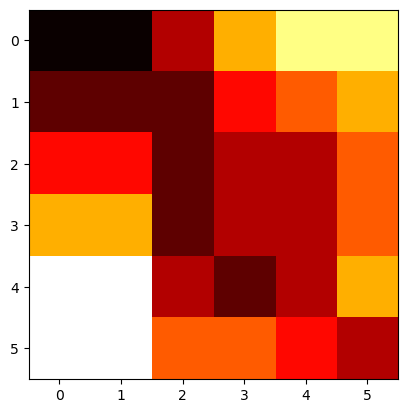

In [18]:
import matplotlib.pyplot as plt

x1 = np.array([1,2,3,3,4,1])
x2 = np.array([1,1,3,4,3,1])
tablazat = DTW_d(x1,x2,0,0)[0]
print(tablazat)

plt.imshow(tablazat, cmap='hot', interpolation='nearest')
plt.show()

Válasz: A heatmpen látszódik a vetemítő út, jelen esetben ha a legsötétebb 'pixeleket' vesszük használatba akkor a vetemítő utat kapjuk meg.  <br>
A heatmap felépítése igen egyszerű: egy táblázatot színez be a 'pixelek' értékei alapján lineárisan, azaz minél kisebb érték áll egy cellában, ott annál világosabb/sötétebb színt használunk